In [34]:
"""
General workflow for importing a new session
"""
subject = 'P01' # TODO: change this for each subject
verbose = True  # change this for debugging

import matplotlib
%matplotlib inline

from pipeline import Pipeline
settings = dict(debug=False, mne_log_level='Info', sfreq=64) # optional pipeline settings
pipeline = Pipeline(subject, settings)

debugging !??


In [35]:
pipeline.load_raw(verbose=verbose)
print('done')

Opening raw data file C:/Users/ahnaa/tks/openmiir/eeg/preprocessing/notebooks\mne\P01-raw.fif...
Isotrak not found
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
done


In [4]:
print(pipeline.raw.info) 

<Info | 11 non-empty values
 bads: 3 items (P8, P10, T8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 STIM
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2015-01-28 17:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: []
 sfreq: 512.0 Hz
>


# Reject Bad Channels

In [6]:
# switch to interactive GUI mode to scroll through data
%matplotlib tk 
pipeline.plot_raw();
pass

scroll using cursor keys, click on channels to mark as "bad"
Channels marked as bad: ['P8', 'P10', 'T8']


In [3]:
# switch back to inline mode
%matplotlib inline

In [20]:
# pipeline.reset_bad_channels() # use this to reset the channel list if needed

In [36]:
# TODO: change these value manually
# If you would rather apply the bandpass filter first, continue until it is applied 
# and then come back to this cell
#pipeline.mark_bad_channels(None, save_to_raw=False) # nothing to change, None will keep old values
pipeline.mark_bad_channels(['P8', 'P10', 'T8'], save_to_raw=True)
print('done')

The following channels have been marked as bad: ['P8', 'P10', 'T8']
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
done


In [23]:
pipeline.print_bad_channels()

bad channels: ['P8', 'P10', 'T8']


In [51]:
pipeline.interpolate_bad_channels() # Note: this will overwrite data

The following channels are interpolated: ['P8', 'P10', 'T8']. This overwrites the channel data. To undo this, the raw data needs to be reloaded.
Interpolating bad channels


RuntimeError: Cannot fit headshape without digitization , info["dig"] is None

# Check and Merge Trials

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]
c:\Users\ahnaa\tks\openmiir\eeg\preprocessing\notebooks\pipeline.py:300: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(trial_events, raw.info['sfreq'], raw.first_samp, axes=axes)


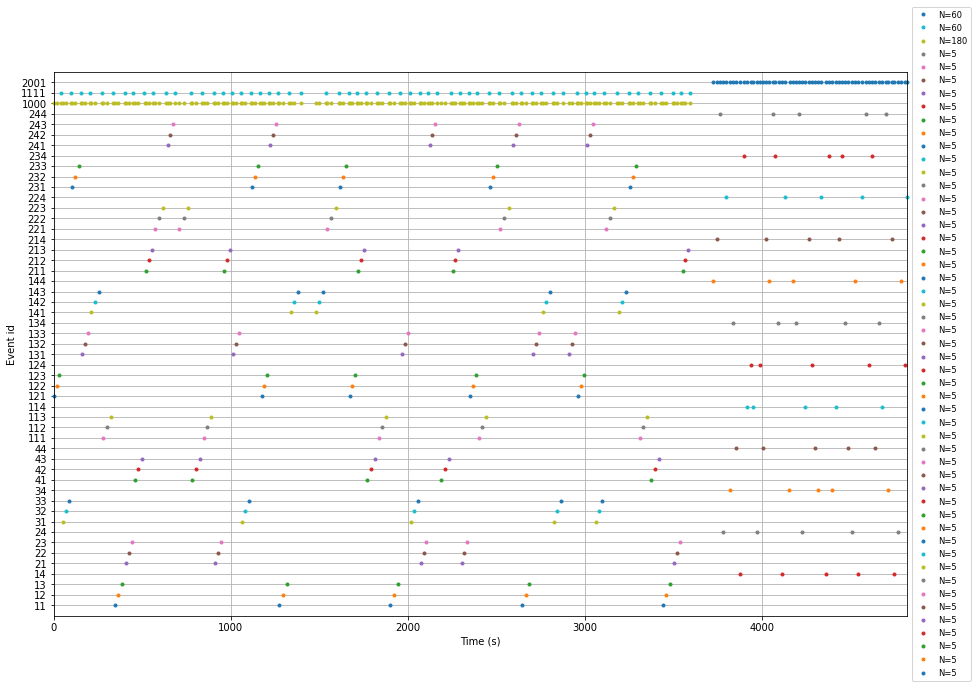

1st event at  1.0
last event at  4820.166015625


In [37]:
pipeline.check_trial_events()

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]
c:\Users\ahnaa\tks\openmiir\eeg\preprocessing\notebooks\pipeline.py:323: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(merged_events, raw.info['sfreq'], raw.first_samp, axes=axes)


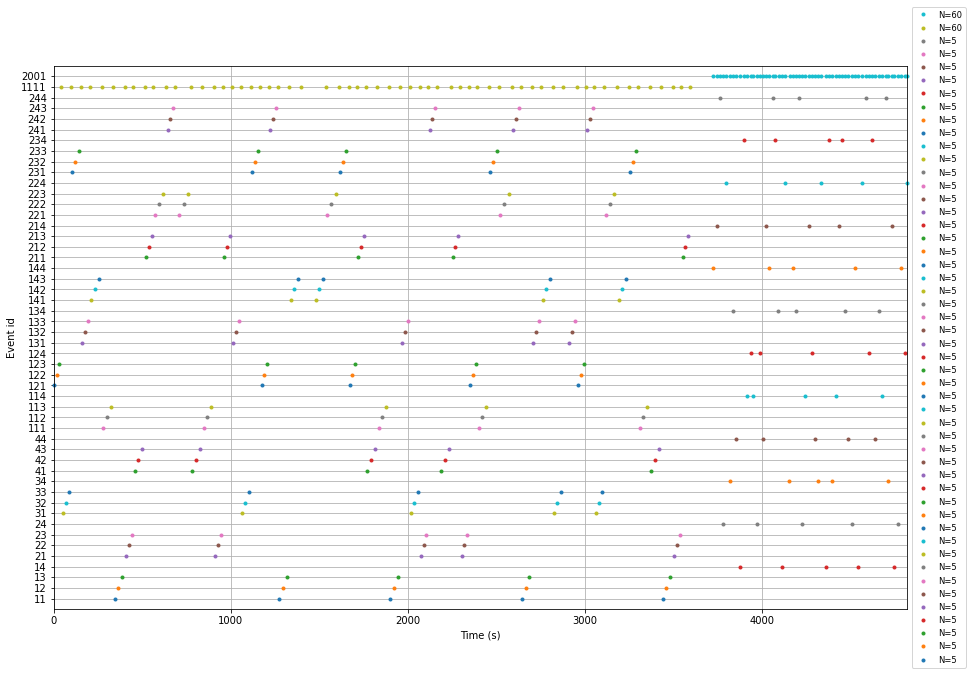

In [38]:
pipeline.check_trial_audio_onset_merge(use_audio_onsets=True, verbose=None)

In [39]:
pipeline.merge_trial_and_audio_onsets()

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]
360 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]


# Check PSD and Channels

Effective window size : 4.000 (s)


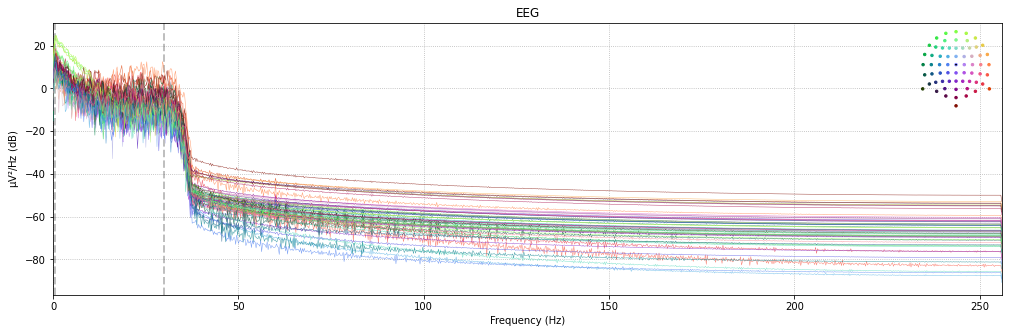

Effective window size : 4.000 (s)


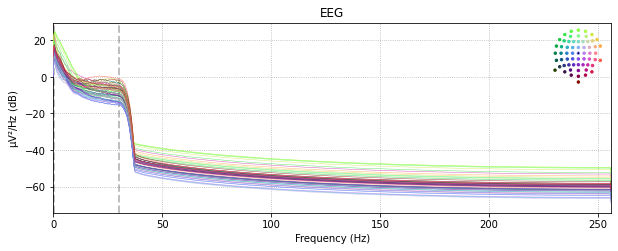

In [15]:
# pipeline.check_psd(fmax=512)
# pipeline.check_psd(fmax=35)
pipeline.check_psd(fmax=256)
pipeline.alt_check_psd()
# line noise will probably be visible @ multiples of 60Hz

(2478166,)


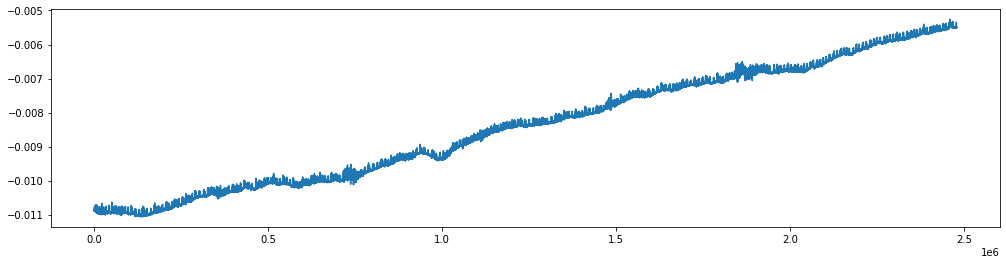

In [13]:
pipeline.check_channel(0)
# quite some drift and movement in the breaks

# Bandpass Filtering

In [40]:
pipeline.bandpass_filter()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (6.604 sec)



In [20]:
%matplotlib tk 
pipeline.plot_raw();
pass

scroll using cursor keys, click on channels to mark as "bad"
Channels marked as bad: ['P8', 'P10', 'T8', 'F1']


In [ ]:
%matplotlib inline

(2478166,)


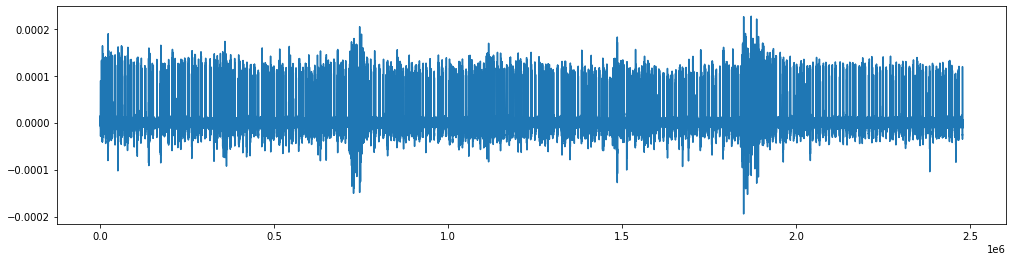

In [24]:
pipeline.check_channel(0)
# looks like we got rid of that drift - nice!
# what's that? eyeblinks?

Effective window size : 4.000 (s)


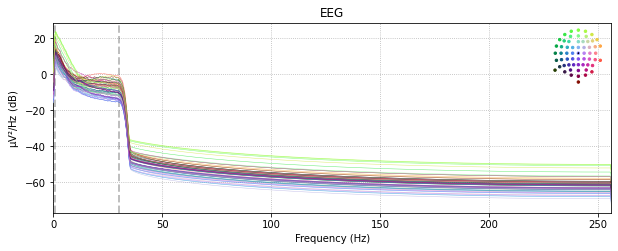

Effective window size : 4.000 (s)


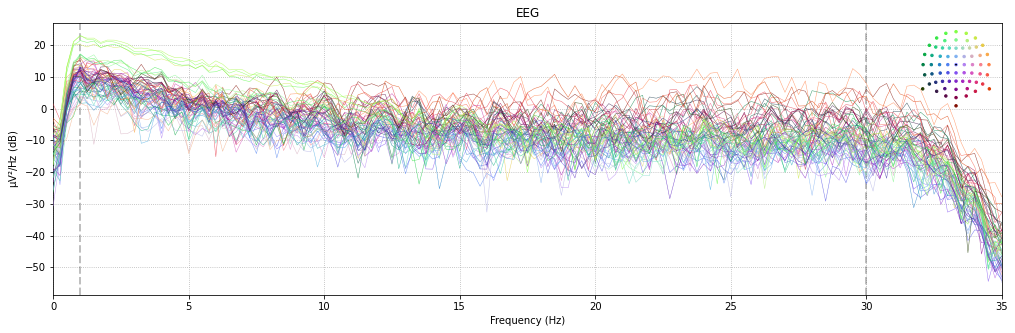

In [26]:
## check PSD again - after bandpass, before down-sampling
pipeline.alt_check_psd()
pipeline.check_psd(fmax=35)
# 60Hz is still visible

# Beat and EOG Epoching

In [41]:
pipeline.generate_beat_events() # Note: this includes cue-beats !!!
pipeline.beat_epochs.average().plot();

{1: {'id': 1, 'label': b'Chim Chim Cheree (lyrics)', 'audio_file': b'S01_Chim Chim Cheree_lyrics.wav', 'cue_file': b'S01_Chim Chim Cheree_lyrics_cue.wav', 'length_with_cue': 14.9657, 'length_of_cue': 1.65, 'length_without_cue': 13.3157, 'length_of_cue_only': 1.9109, 'cue_bpm': 210, 'beats_per_bar': 3, 'num_bars': 16, 'cue_bars': 2, 'bpm': 213, 'approx_bar_length': 0.8571428571428571}, 2: {'id': 2, 'label': b'Take me out to the ballgame (lyrics)', 'audio_file': b'S02_Take Me Out To The Ballgame_lyrics.wav', 'cue_file': b'S02_Take Me Out To The Ballgame_lyrics_cue.wav', 'length_with_cue': 9.5352, 'length_of_cue': 1.867, 'length_without_cue': 7.6682, 'length_of_cue_only': 2.1424, 'cue_bpm': 186, 'beats_per_bar': 3, 'num_bars': 8, 'cue_bars': 2, 'bpm': 189, 'approx_bar_length': 0.967741935483871}, 3: {'id': 3, 'label': b'Jingle Bells (lyrics)', 'audio_file': b'S03_Jingle Bells_lyrics.wav', 'cue_file': b'S03_Jingle Bells_lyrics_cue.wav', 'length_with_cue': 11.9797, 'length_of_cue': 2.317, '

KeyError: 12.1

In [ ]:
pipeline.find_eog_events()
# wow - that's a lot of blinking

# Down-Sampling

In [27]:
pipeline.downsample()


        from doc:
                up computations (e.g., projection calculation) when precise timing
                of events is not required, as downsampling raw data effectively
                jitters trigger timings. It is generally recommended not to epoch
                downsampled data, but instead epoch and then downsample, as epoching
                downsampled data jitters triggers.

        NOTE: event onset collisions will be reported as warnings
              in that case, it might be a good idea to pick either the trial onset or audio onset events
              and delete the other ones before downsampling
        
down-sampling raw and events stim channel ...
360 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]
down-sampling epochs ...


AttributeError: 'Pipeline' object has no attribute 'beat_epochs'

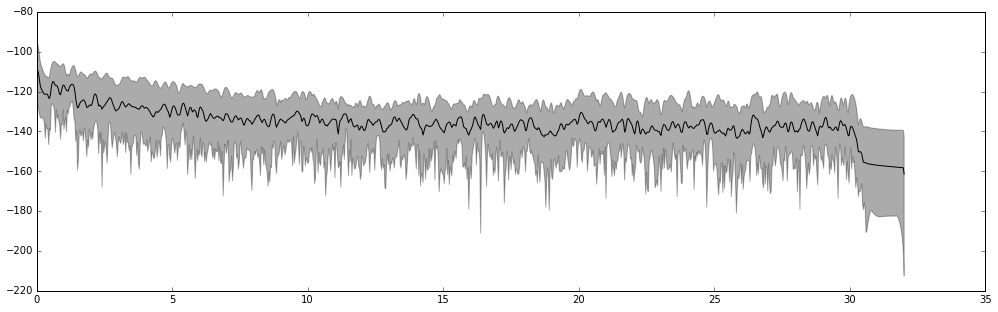

In [18]:
## PSD after down-sampling:
pipeline.check_psd(fmax=35)
# looks less smooth than without down-sampling

360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2001]


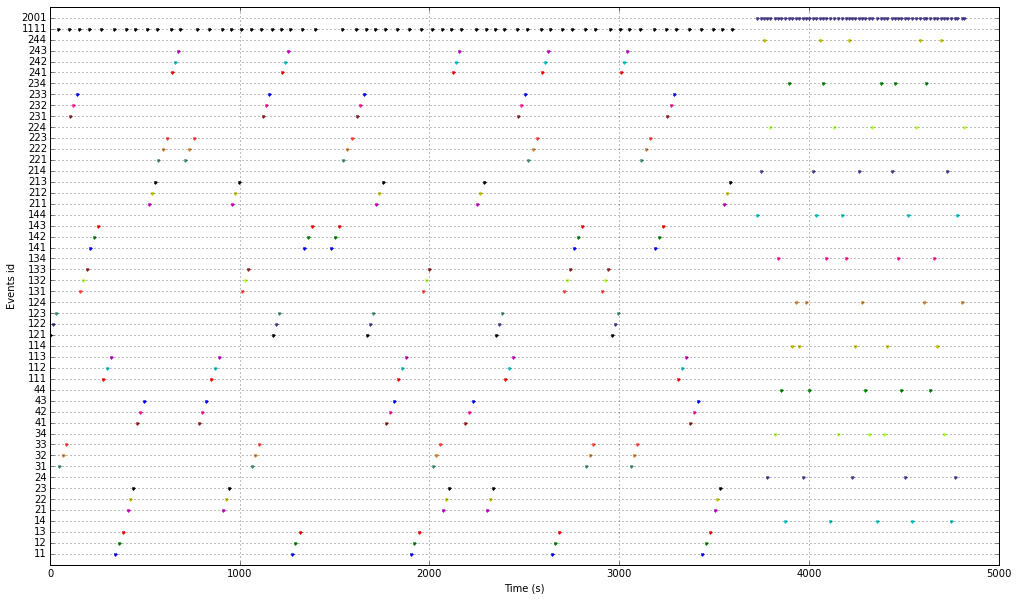

event onset jitter (min, mean, max): -0.013671875 -0.00725911458333 0.0


In [19]:
# check events after after resampling -> should get the same result as above
pipeline.check_resampled_trial_events(plot=True, verbose=False)

# ICA

In [34]:
pipeline.compute_ica(verbose=True)

AttributeError: 'Pipeline' object has no attribute 'beat_epochs'

In [35]:
%matplotlib inline
pipeline.plot_ica_components() # static plot

AttributeError: 'NoneType' object has no attribute 'mixing_matrix_'

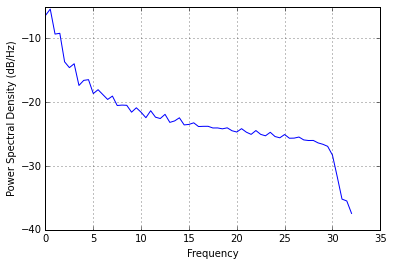

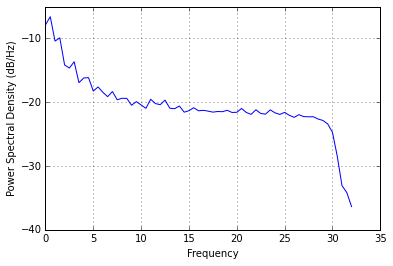

In [22]:
pipeline.inspect_source_psd(1) # plot the PSD of an IC source to look for alpha activity
pipeline.inspect_source_psd(2)

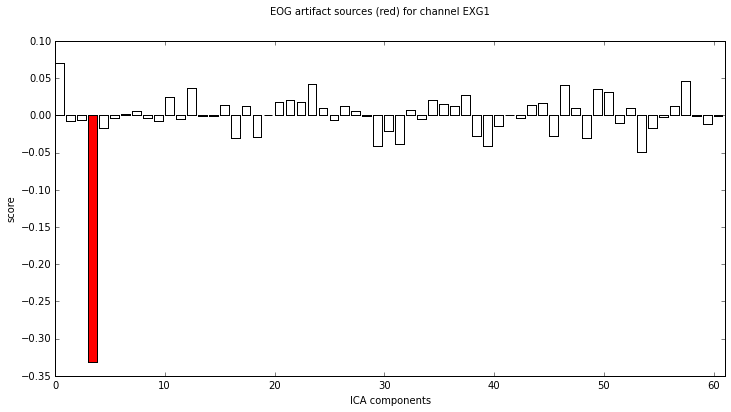

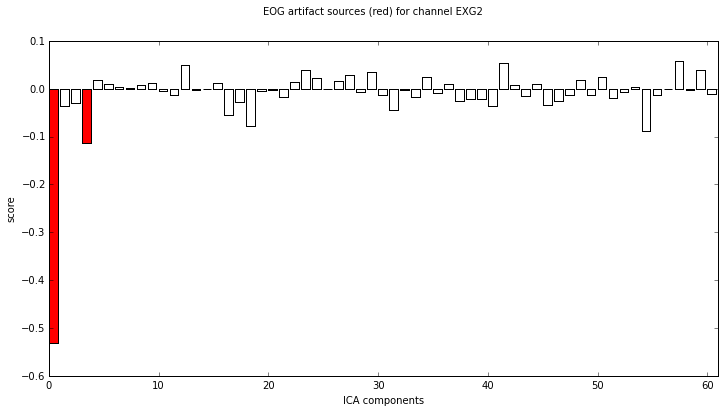

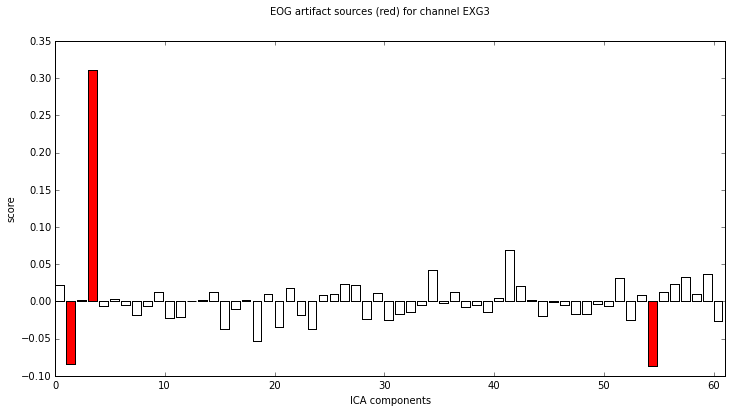

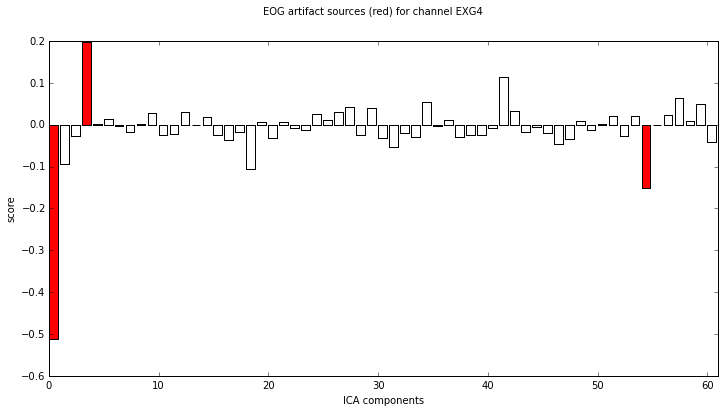

suggested EOG artifact channels:  [0, 1, 3, 54]
EOG artifact component scores:  [ 0.53093529  0.09295009  0.3315735   0.15046224]


In [23]:
pipeline.find_eog_artifact_sources(plot=True, verbose=False)

In [24]:
pipeline.auto_detect_artifact_components()

    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    6, 10, 16
Ready.
merging [[0, 1, 3, 54], [6, 10, 16]]


suggested channels to reject (selection="auto"):  [0, 1, 3, 6, 10, 16, 54]
To change the component selection, specify select=[...] (component numbers) or select=N (top-N) and run this command again!


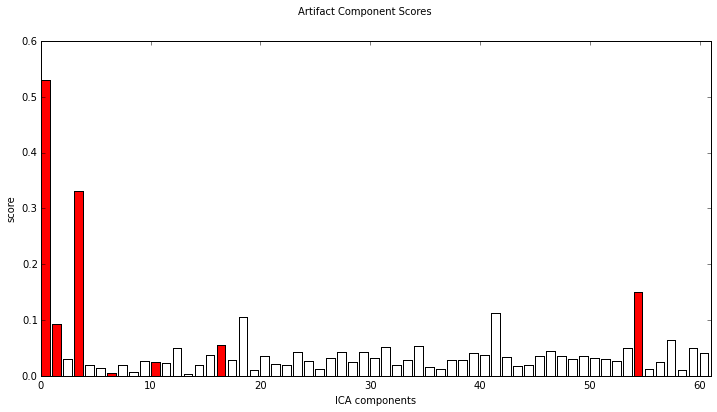

current selection: [0, 1, 3, 6, 10, 16, 54]


In [25]:
pipeline.select_artifact_sources(selection='auto')

In [35]:
pipeline.exclude_ica_components(selection=[0, 1, 3,11]) # TODO: adapt selection list
# use cells below to decide, which components to reject, then come back to this cell

excluding ICA components:  [0, 1, 3, 11]


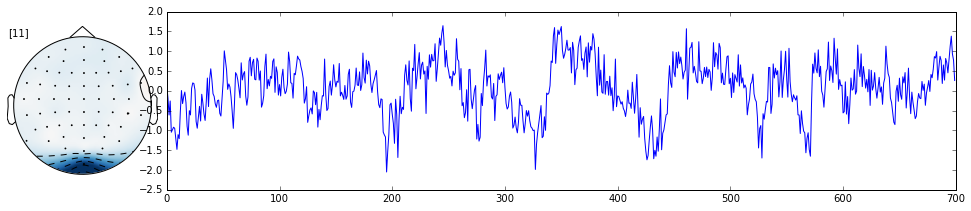

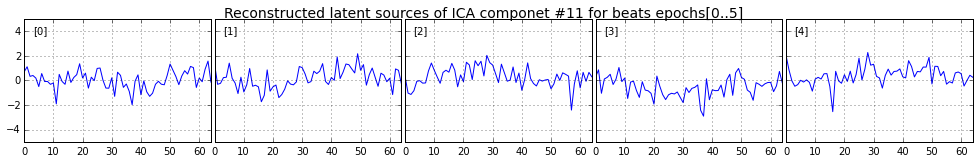

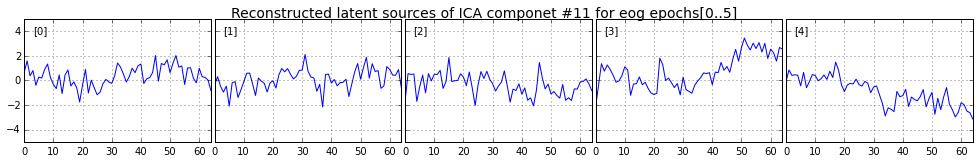

In [34]:
pipeline.inspect_ica_component(11, [0, 700])
pipeline.inspect_source_epochs(11, mode='beats', vmax=5)
pipeline.inspect_source_epochs(11, mode='eog', vmax=5)

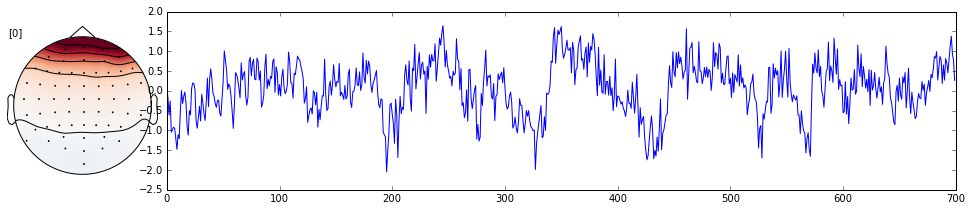

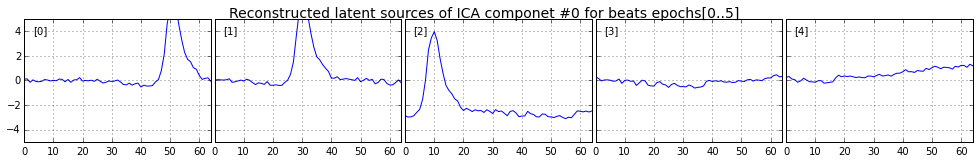

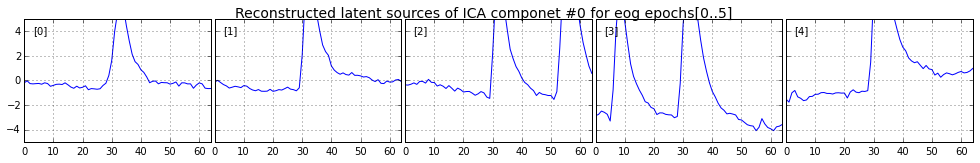

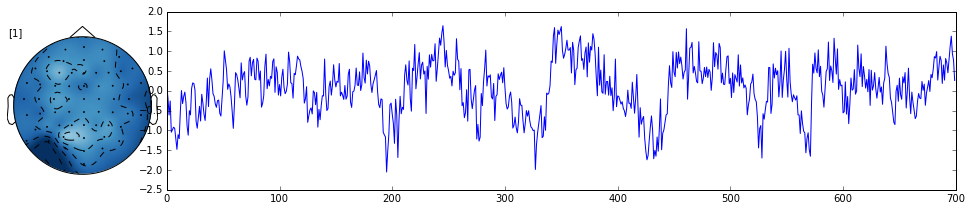

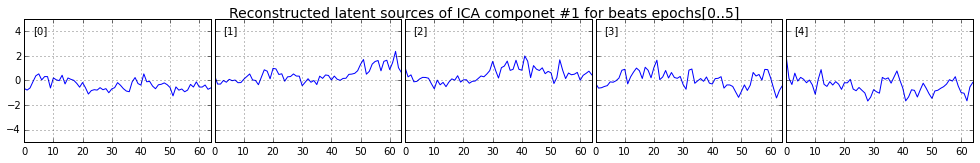

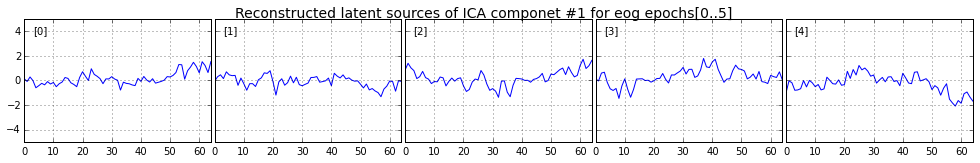

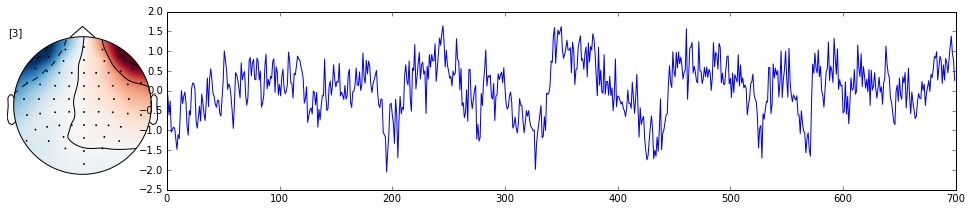

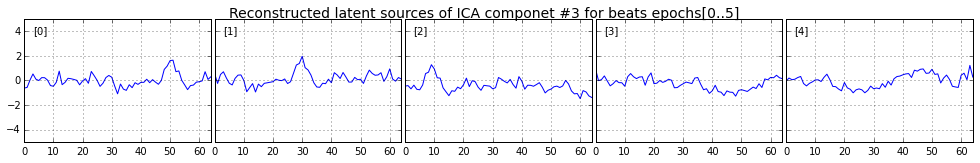

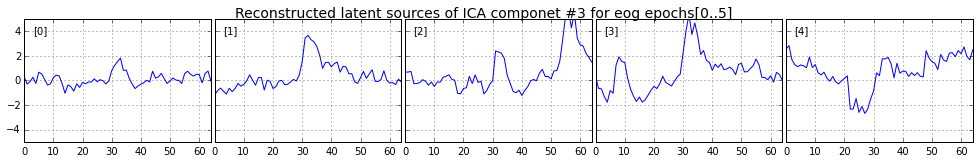

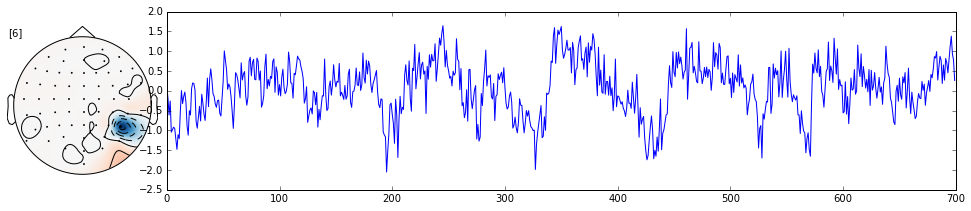

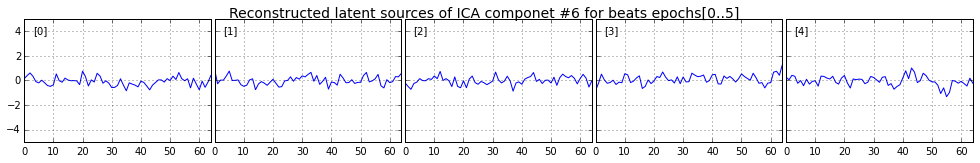

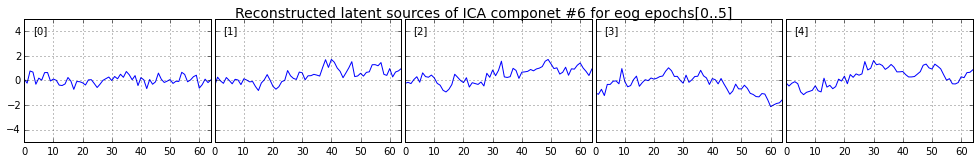

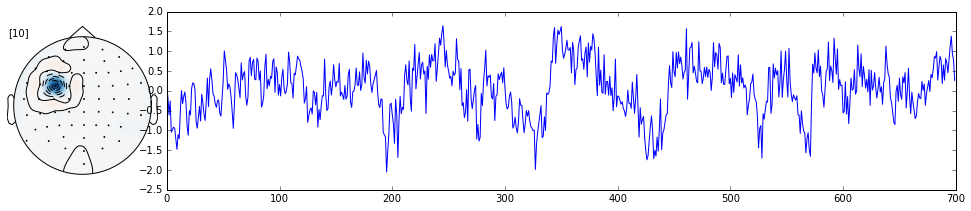

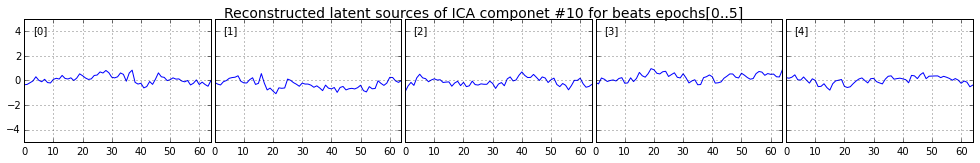

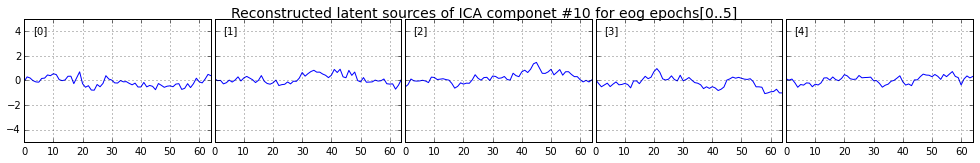

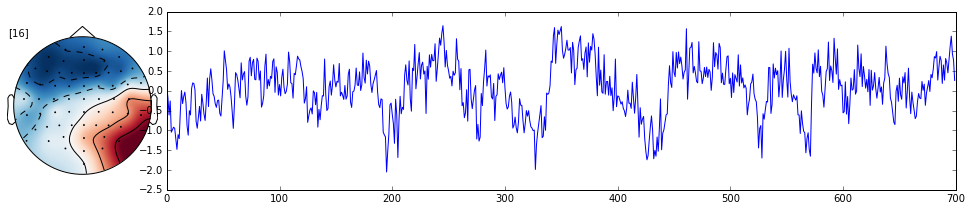

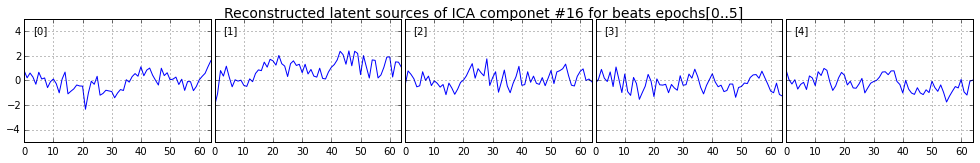

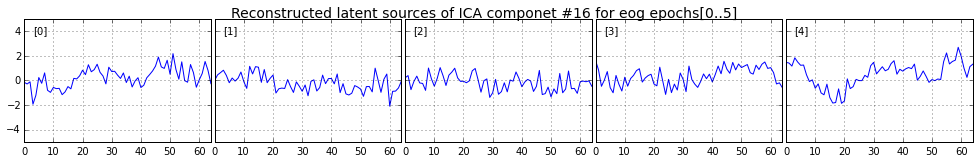

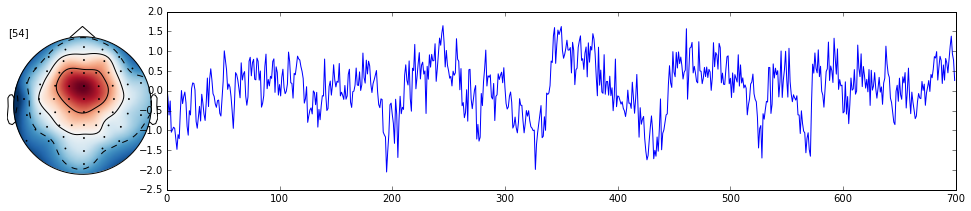

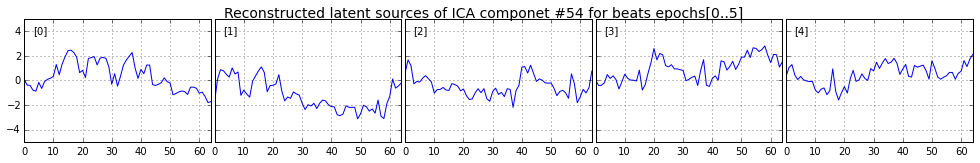

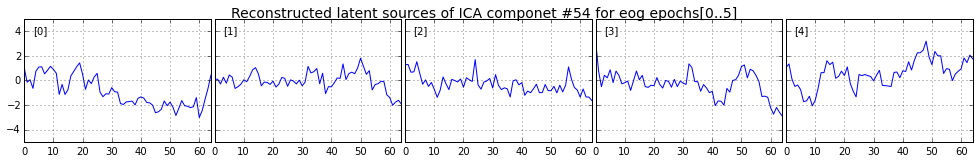

In [28]:
for ic in pipeline.suggested_artifact_components:
# for ic in pipeline.ica.exclude:
    pipeline.inspect_ica_component(ic, [0, 700])
    pipeline.inspect_source_epochs(ic, mode='beats', vmax=5)
    pipeline.inspect_source_epochs(ic, mode='eog', vmax=5)

NOTE: Plotting in non-interactive mode.


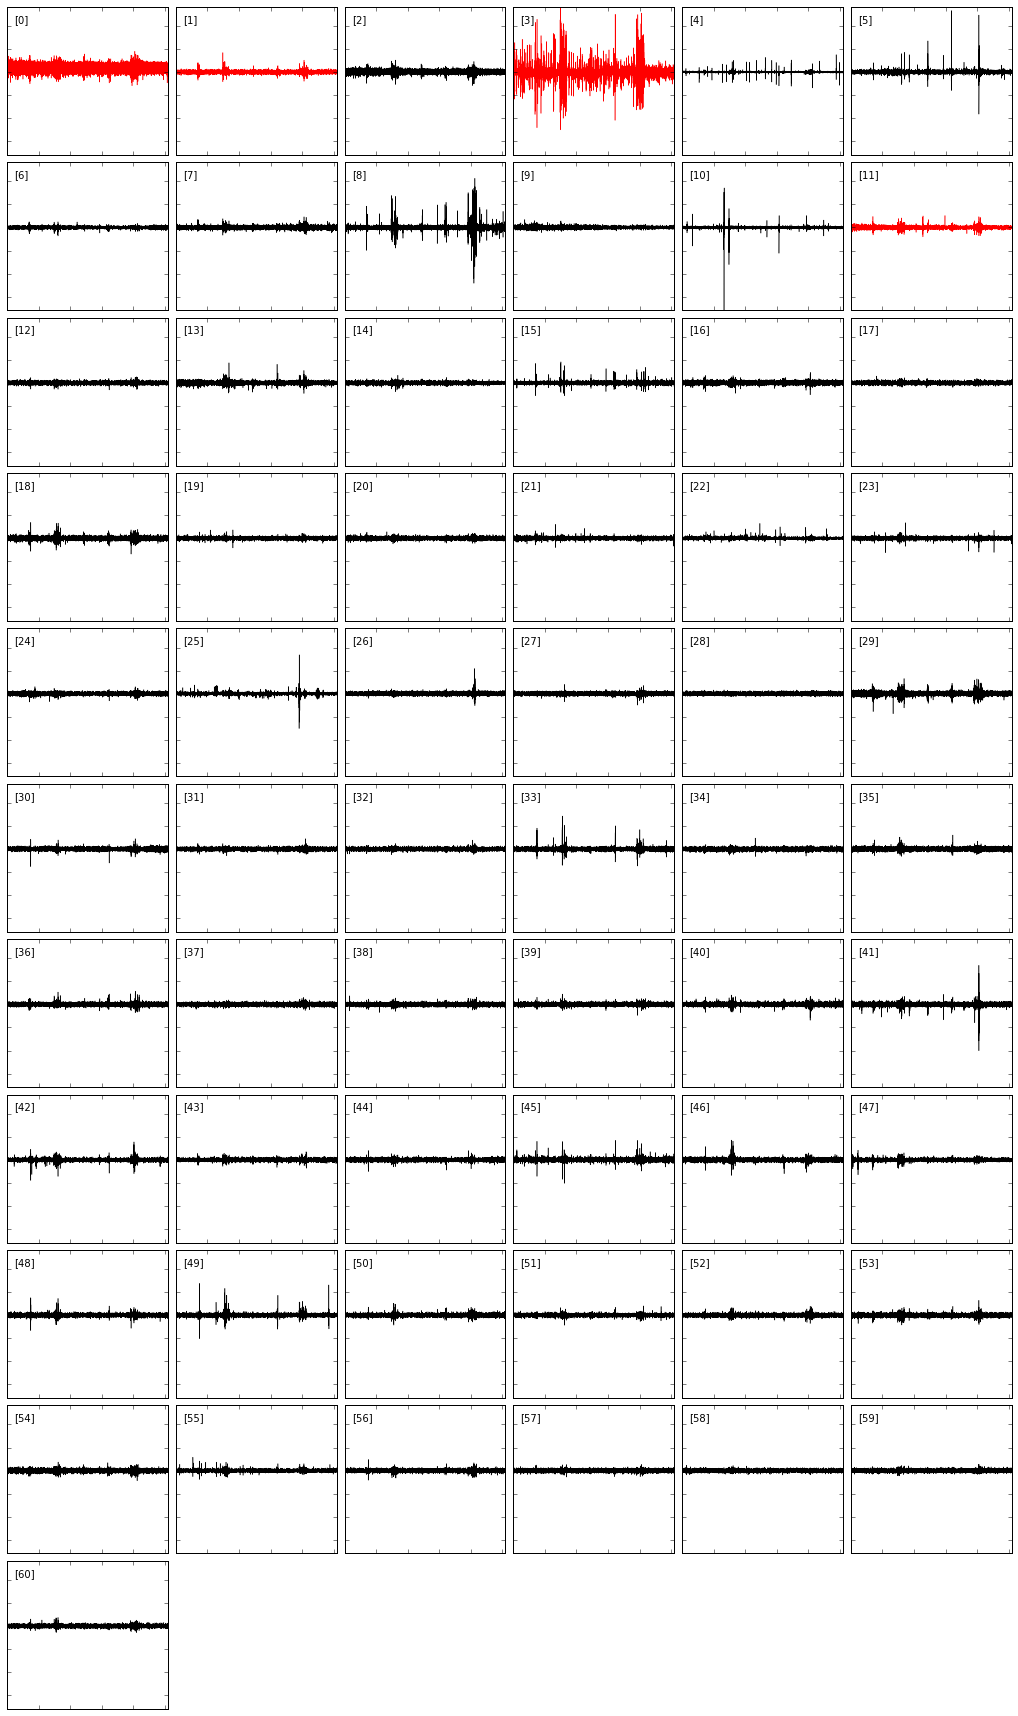

In [36]:
# enable this for interactive mode
# %matplotlib tk

# pipeline.plot_sources(mode='raw')   # this may take a while
# pipeline.plot_sources(mode='beats')
pipeline.plot_sources(mode='eog');

In [37]:
# switch back to non-interactive inline mode
%matplotlib inline

Assess impact on average EOG artifact:


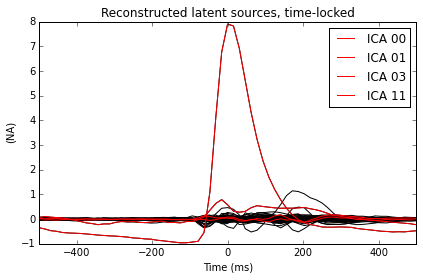

Assess cleaning of EOG epochs:
Transforming to ICA space (61 components)
Zeroing out 4 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 61 PCA components


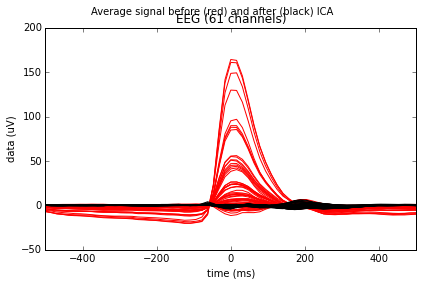

Assess impact on raw. Check the amplitudes do not change:
Transforming to ICA space (61 components)
Zeroing out 4 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 61 PCA components


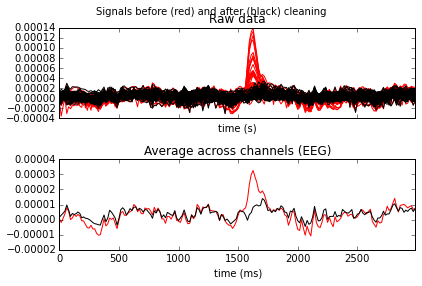

Assess impact on evoked. Check the amplitudes do not change:
Transforming to ICA space (61 components)
Zeroing out 4 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 61 PCA components


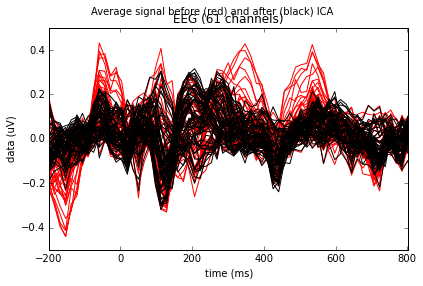

In [38]:
pipeline.assess_unmixing_quality(verbose=False)

In [39]:
pipeline.save_ica('100p_64c') # save for later

Writing ica solution to /imaging/deepthought/datasets/mpi2015/eeg/mne/P01-100p_64c-ica.fif...


# Application Test

In [3]:
pipeline.load_ica('100p_64c')

Reading /imaging/deepthought/datasets/mpi2015/eeg/mne/P01-100p_64c-ica.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
Now restoring ICA solution ...
Ready.


Transforming to ICA space (63 components)
Zeroing out 2 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 64 PCA components
scroll using cursor keys, click on channels to mark as "bad"


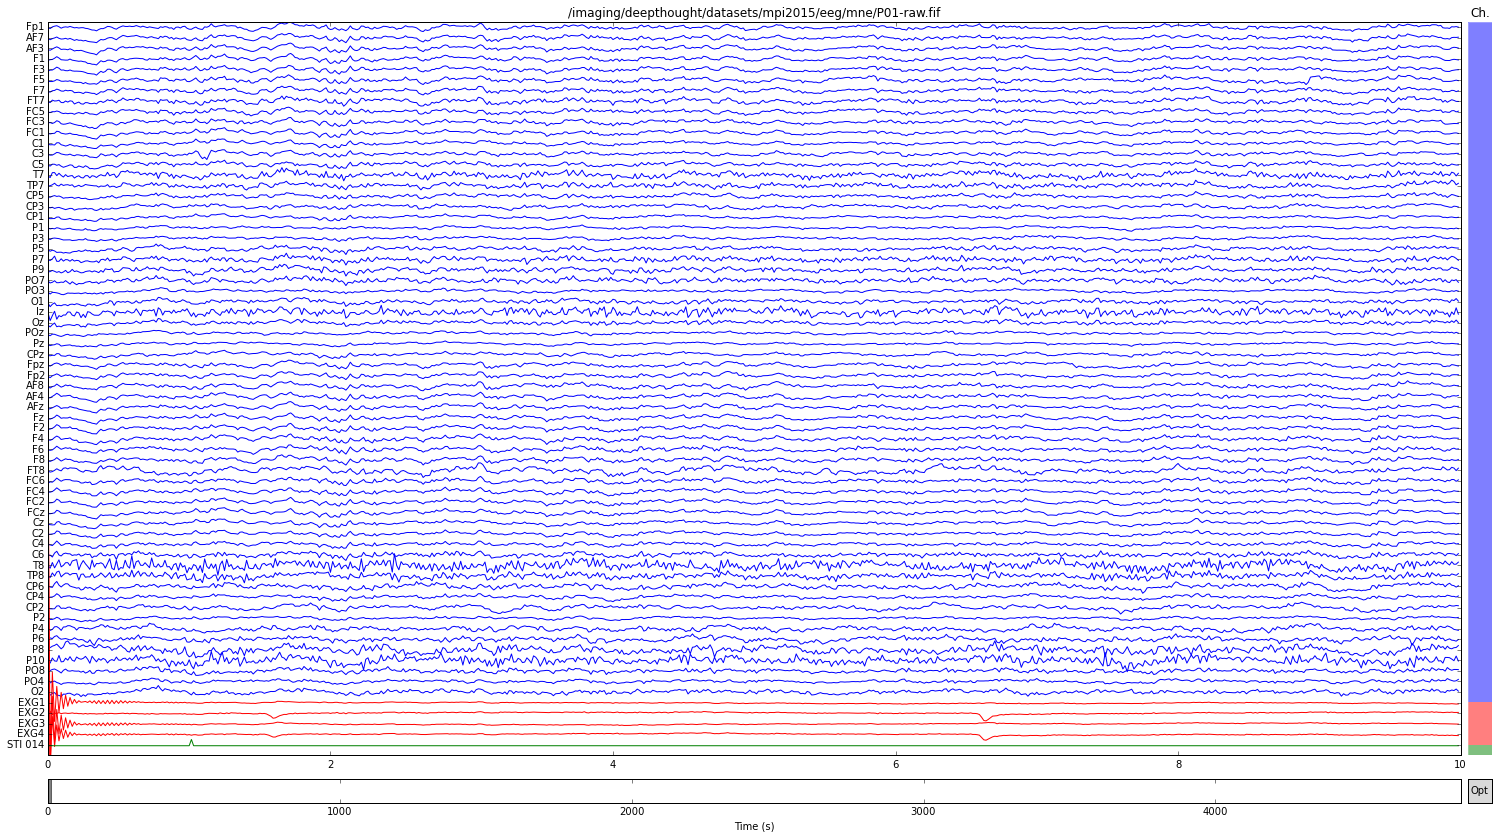

In [47]:
raw = pipeline.ica.apply(pipeline.raw, exclude=(pipeline.ica.exclude), copy=False)
if len(raw.info['bads']) > 0:
    raw.interpolate_bads_eeg() # interpolate bad channels afterwards as they are not processed by the ICA

%matplotlib tk 
pipeline.plot_raw();
pass